In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split 

# Import Data & EDA (see R code)

In [2]:
all_data = pd.read_csv('crimedata.csv')
all_data.head()

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39.0,5320.0,1,11980,3.10,1.37,91.78,6.50,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,PA,45.0,47616.0,1,23123,2.82,0.80,95.57,3.44,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,1,29344,2.43,0.74,94.33,3.43,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,Gloversvillecity,NY,35.0,29443.0,1,16656,2.40,1.70,97.35,0.50,...,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN
4,Bemidjicity,MN,7.0,5068.0,1,11245,2.76,0.53,89.16,1.17,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,NaN,9988.79


# Correlation (Refer to R code)

# Data Processing

In [3]:
# only include variables of interest
cols = [
    "communityname", "LandArea", "population", "racepctblack", "agePct12t29",
    "perCapInc", "PctLess9thGrade", "PctUnemployed", "ViolentCrimesPerPop", "nonViolPerPop"
]
data = all_data[cols]

# remove all rows with missing values
data = data.dropna()

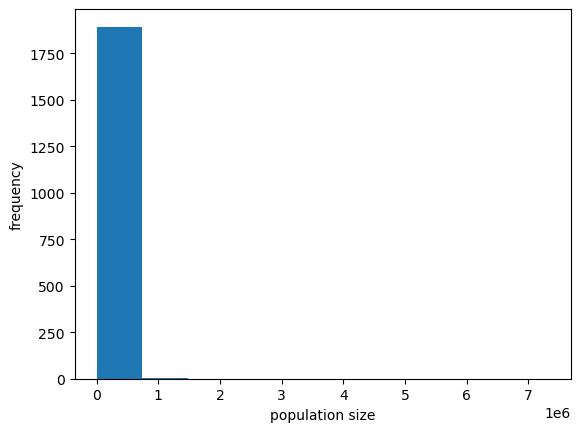

In [4]:
# detect outliers - population
plt.hist(data.population)
plt.xlabel('population size')
plt.ylabel('frequency')
plt.show()

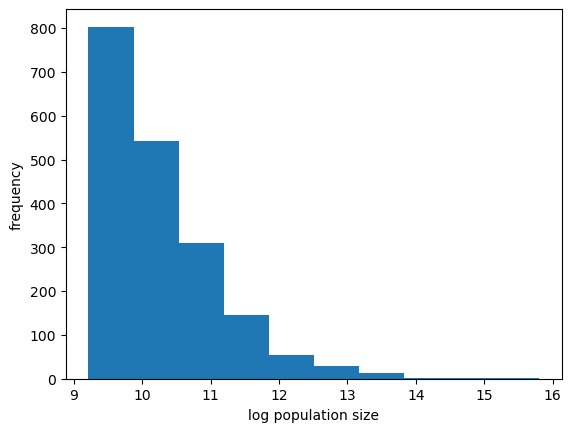

In [5]:
# rescale outliers - data transformation
data['log_pop'] = data['population'].apply(lambda r: np.log(r))
plt.hist(data.log_pop)
plt.xlabel('log population size')
plt.ylabel('frequency')
plt.show()

# Correlation

In [6]:
crimes = ["ViolentCrimesPerPop", "nonViolPerPop"]
var = ["log_pop","racepctblack", "agePct12t29", "perCapInc", "PctLess9thGrade", "PctUnemployed"]
col = ["ViolentCrimesPerPop", "nonViolPerPop", "log_pop","racepctblack", "agePct12t29", "perCapInc", "PctLess9thGrade", "PctUnemployed"]

In [7]:
corr = data[col].corr()
corr.style.background_gradient(cmap='coolwarm')

,ViolentCrimesPerPop,nonViolPerPop,log_pop,racepctblack,agePct12t29,perCapInc,PctLess9thGrade,PctUnemployed
ViolentCrimesPerPop,1.000000,0.675374,0.397661,0.623833,0.109940,-0.313196,0.370807,0.474968
nonViolPerPop,0.675374,1.000000,0.309761,0.474325,0.111280,-0.317037,0.287849,0.392085
log_pop,0.397661,0.309761,1.000000,0.229356,0.142935,-0.050381,0.009199,0.136630
racepctblack,0.623833,0.474325,0.229356,1.000000,0.120513,-0.260503,0.225874,0.373413
agePct12t29,0.109940,0.111280,0.142935,0.120513,1.000000,-0.377246,0.127660,0.204490
perCapInc,-0.313196,-0.317037,-0.050381,-0.260503,-0.377246,1.000000,-0.543778,-0.600828
PctLess9thGrade,0.370807,0.287849,0.009199,0.225874,0.127660,-0.543778,1.000000,0.695751
PctUnemployed,0.474968,0.392085,0.136630,0.373413,0.204490,-0.600828,0.695751,1.000000


In [8]:
corr.loc[var, crimes].style.background_gradient(cmap='coolwarm')

,ViolentCrimesPerPop,nonViolPerPop
log_pop,0.397661,0.309761
racepctblack,0.623833,0.474325
agePct12t29,0.109940,0.111280
perCapInc,-0.313196,-0.317037
PctLess9thGrade,0.370807,0.287849
PctUnemployed,0.474968,0.392085


# Graphic & Statistical Analysis - Scatterplot & Linear Regression

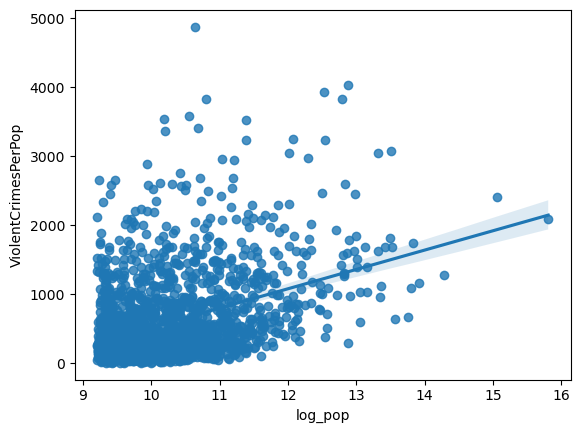

In [9]:
#scatter plot
sns.regplot(x = "log_pop", y = "ViolentCrimesPerPop", data = data)
plt.show()

In [10]:
#linear regression
x, y = np.array(data.log_pop), np.array(data.ViolentCrimesPerPop)
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     356.9
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           4.39e-73
Time:                        15:17:22   Log-Likelihood:                -14728.
No. Observations:                1902   AIC:                         2.946e+04
Df Residuals:                    1900   BIC:                         2.947e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2285.4775    152.414    -14.995      0.0

In [11]:
def analyze(vx, vy, data):
    # scatter plot
    sns.regplot(x = vx, y = vy, data = data)
    plt.show()
    
    #linear regression
    x, y = np.array(data[vx]), np.array(data[vy])
    x = sm.add_constant(x)
    model = sm.OLS(y, x)
    results = model.fit()
    print(results.summary())

******************************
log_pop ~ ViolentCrimesPerPop


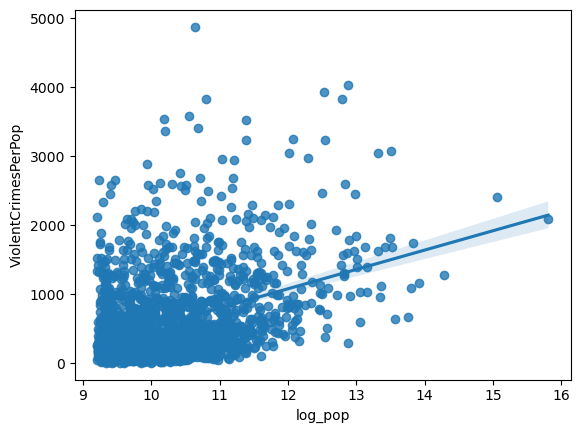

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     356.9
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           4.39e-73
Time:                        15:17:24   Log-Likelihood:                -14728.
No. Observations:                1902   AIC:                         2.946e+04
Df Residuals:                    1900   BIC:                         2.947e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2285.4775    152.414    -14.995      0.0

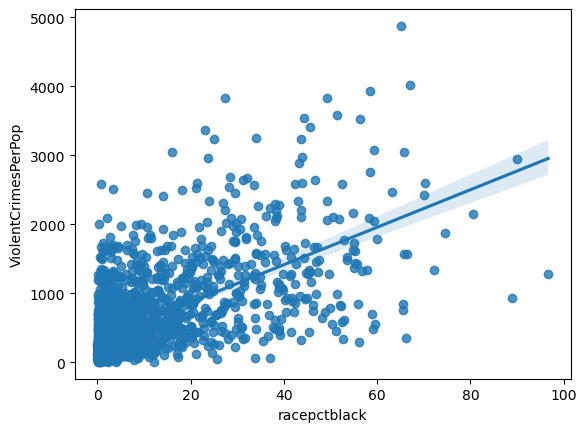

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     1211.
Date:                Thu, 30 Nov 2023   Prob (F-statistic):          1.24e-205
Time:                        15:17:24   Log-Likelihood:                -14423.
No. Observations:                1902   AIC:                         2.885e+04
Df Residuals:                    1900   BIC:                         2.886e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        328.7861     13.136     25.029      0.0

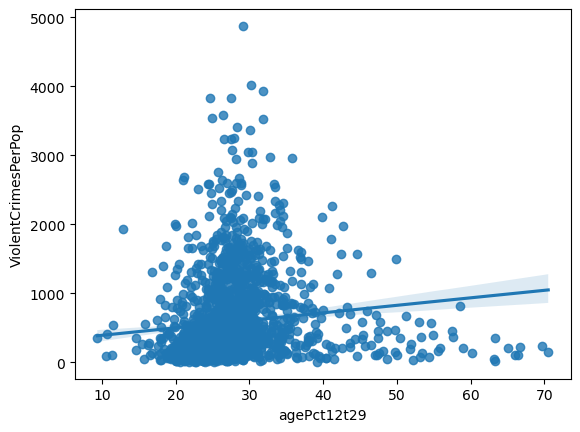

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     23.25
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           1.54e-06
Time:                        15:17:25   Log-Likelihood:                -14880.
No. Observations:                1902   AIC:                         2.976e+04
Df Residuals:                    1900   BIC:                         2.977e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        283.7136     63.745      4.451      0.0

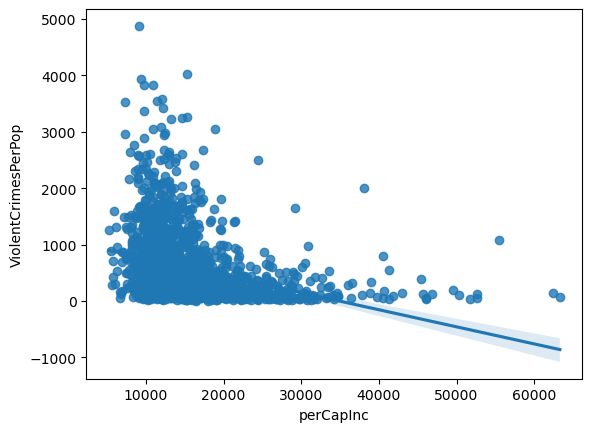

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     206.6
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           1.48e-44
Time:                        15:17:25   Log-Likelihood:                -14793.
No. Observations:                1902   AIC:                         2.959e+04
Df Residuals:                    1900   BIC:                         2.960e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1056.3363     35.448     29.799      0.0

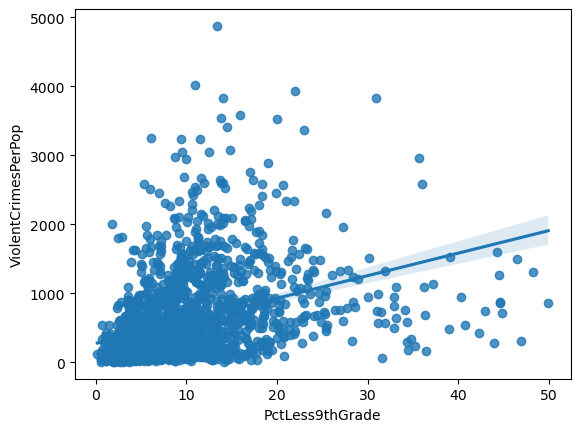

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     302.9
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           4.61e-63
Time:                        15:17:25   Log-Likelihood:                -14751.
No. Observations:                1902   AIC:                         2.951e+04
Df Residuals:                    1900   BIC:                         2.952e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        274.9401     21.968     12.515      0.0

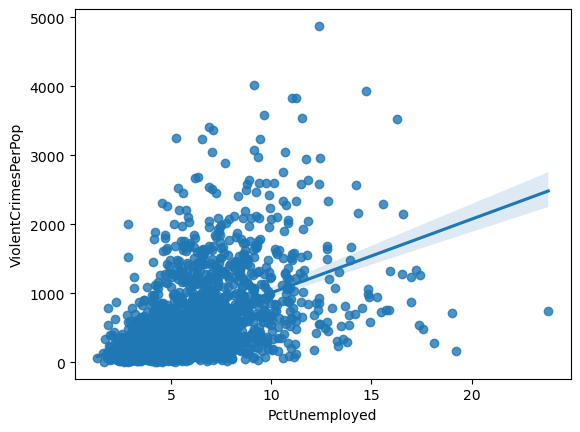

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     553.5
Date:                Thu, 30 Nov 2023   Prob (F-statistic):          1.27e-107
Time:                        15:17:25   Log-Likelihood:                -14648.
No. Observations:                1902   AIC:                         2.930e+04
Df Residuals:                    1900   BIC:                         2.931e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -57.6978     29.899     -1.930      0.0

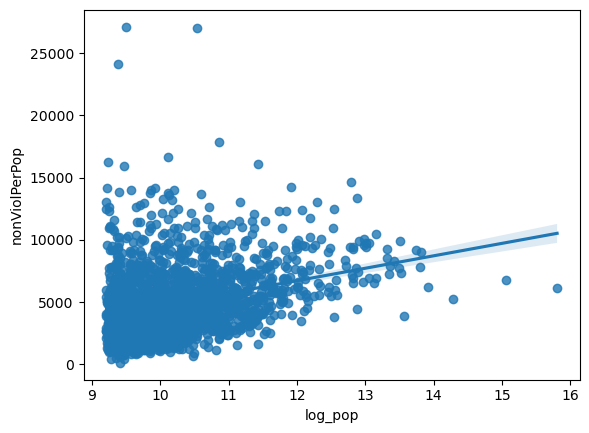

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     201.7
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           1.42e-43
Time:                        15:17:26   Log-Likelihood:                -17690.
No. Observations:                1902   AIC:                         3.538e+04
Df Residuals:                    1900   BIC:                         3.540e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5296.5017    723.568     -7.320      0.0

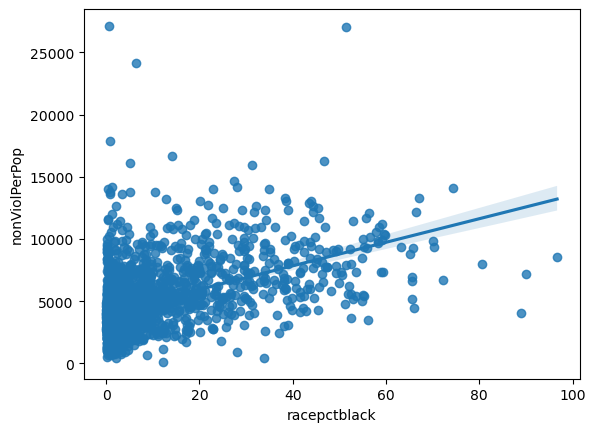

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     551.6
Date:                Thu, 30 Nov 2023   Prob (F-statistic):          2.70e-107
Time:                        15:17:26   Log-Likelihood:                -17544.
No. Observations:                1902   AIC:                         3.509e+04
Df Residuals:                    1900   BIC:                         3.510e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4054.4092     67.788     59.810      0.0

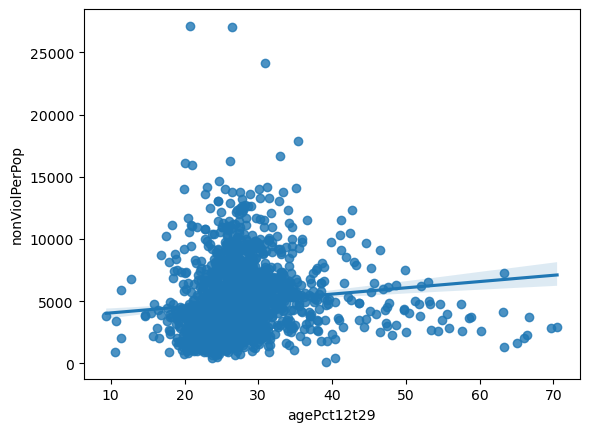

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     23.82
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           1.14e-06
Time:                        15:17:26   Log-Likelihood:                -17774.
No. Observations:                1902   AIC:                         3.555e+04
Df Residuals:                    1900   BIC:                         3.556e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3551.2913    291.987     12.163      0.0

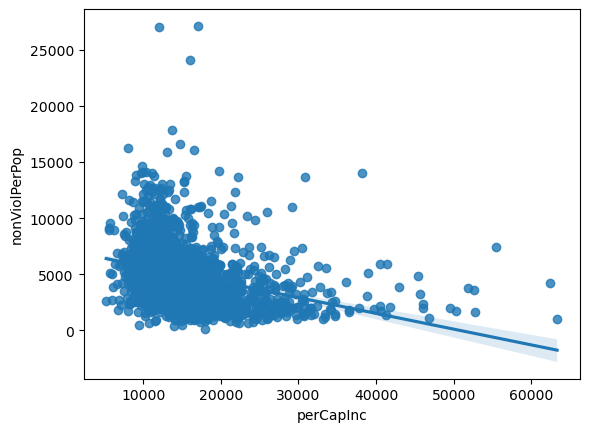

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     212.3
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           1.13e-45
Time:                        15:17:27   Log-Likelihood:                -17685.
No. Observations:                1902   AIC:                         3.537e+04
Df Residuals:                    1900   BIC:                         3.539e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7134.1450    162.178     43.990      0.0

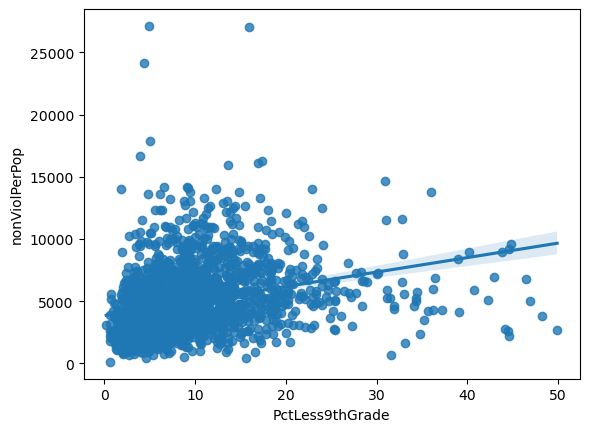

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     171.7
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           1.31e-37
Time:                        15:17:27   Log-Likelihood:                -17704.
No. Observations:                1902   AIC:                         3.541e+04
Df Residuals:                    1900   BIC:                         3.542e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3844.3039    103.779     37.043      0.0

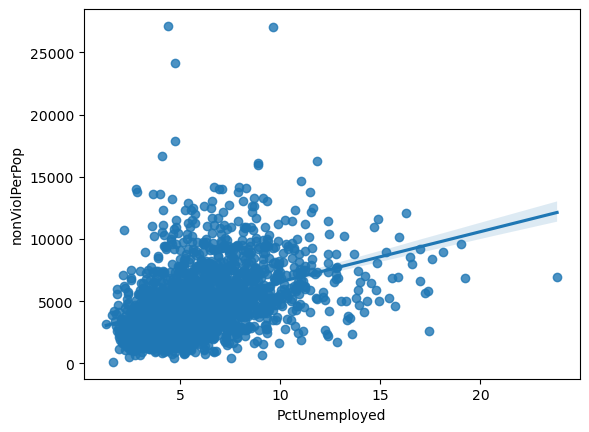

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     345.1
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           6.32e-71
Time:                        15:17:27   Log-Likelihood:                -17627.
No. Observations:                1902   AIC:                         3.526e+04
Df Residuals:                    1900   BIC:                         3.527e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2516.7229    143.190     17.576      0.0

In [12]:
crimes = ["ViolentCrimesPerPop", "nonViolPerPop"]
var = ["log_pop","racepctblack", "agePct12t29", "perCapInc", "PctLess9thGrade", "PctUnemployed"]
for c in crimes:
    for v in var:
        print('*'*30)
        print(v,'~',c)
        analyze(v, c, data)
        print('*'*30,'\n')

# Logistic Regression

In [13]:
violent_avg = data.ViolentCrimesPerPop.mean() # 583.6948054679285
non_violent_avg = data.nonViolPerPop.mean() # 4942.323838065195
data['violent_higher_than_avg'] = data['ViolentCrimesPerPop'].apply(lambda r: int(r>violent_avg))
data['nonviolent_higher_than_avg'] = data['nonViolPerPop'].apply(lambda r: int(r>non_violent_avg))

### logistic reg model for Violent Crime  

In [14]:
X = data[["log_pop","racepctblack", "agePct12t29", "perCapInc", "PctLess9thGrade", "PctUnemployed"]].values
y = data["violent_higher_than_avg"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.25, shuffle=True)
logr = linear_model.LogisticRegression()
logr.fit(X_train, y_train)

LogisticRegression()

In [15]:
# pred
y_pred = logr.predict(X_test)

# accuracy
np.sum(y_pred==y_test)/len(y_pred)

0.7899159663865546

In [16]:
logr.coef_, logr.intercept_

(array([[ 0.1210386 ,  0.08085501, -0.05733263, -0.00014717,  0.02561913,
          0.13142781]]),
 array([-0.00886589]))

### logistic reg model for Non-violent Crime  

In [17]:
X = data[["log_pop","racepctblack", "agePct12t29", "perCapInc", "PctLess9thGrade", "PctUnemployed"]].values
y = data["nonviolent_higher_than_avg"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.25, shuffle=True)
logr = linear_model.LogisticRegression()
logr.fit(X_train, y_train)

LogisticRegression()

In [18]:
# pred
y_pred = logr.predict(X_test)

# accuracy
np.sum(y_pred==y_test)/len(y_pred)

0.7310924369747899

In [19]:
logr.coef_, logr.intercept_

(array([[ 1.36748555e-01,  6.83241429e-02, -4.69349829e-02,
         -1.14611955e-04, -2.04186930e-02,  1.64649289e-01]]),
 array([-0.00364043]))